In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/learn-together'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

# Load dataset

In [2]:
original_train = pd.read_csv('/kaggle/input/learn-together/train.csv', index_col = 'Id')

In [3]:
X = original_train.drop(['Cover_Type'], axis = 1)
y = original_train.Cover_Type

# Frist overview

In [4]:
original_train.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
Id,,,,,,,,,,,,,,,,,,,,,
1,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
2,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
3,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
4,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
5,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [5]:
original_train.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,...,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,1511.147288,...,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000
std,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,1099.936493,...,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066
min,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,730.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,1256.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,3104.000000,261.000000,22.000000,330.000000,79.000000,2270.000000,235.000000,235.000000,167.000000,1988.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
max,3849.000000,360.000000,52.000000,1343.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,6993.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


# Check missing data

In [6]:
col_missing_values = [col for col in original_train.columns if original_train[col].isnull().any()]
print('Following columns have missing values: {}'.format(col_missing_values))

Following columns have missing values: []


None of the columns has missing values

# Analysis of target variable

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

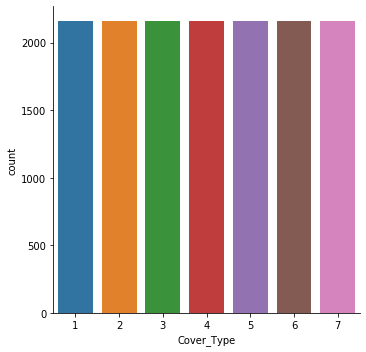

In [8]:
sns.catplot(x = 'Cover_Type', kind = 'count', data = original_train)

All clases have the same number of samples, so they are balanced

# Analysis of independent variables

In [9]:
cat_features = ['Wilderness_Area','Soil_Type']
cat_col = [col for col in original_train.columns for c in cat_features if c in col]
original_train[cat_col] = original_train[cat_col].astype('category')

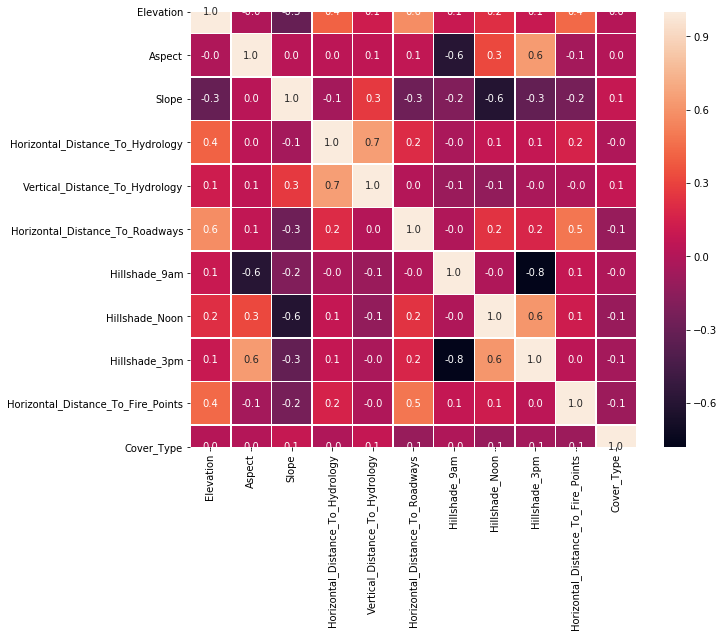

In [10]:
corr_matrix = original_train.corr()
fg, ax = plt.subplots(figsize = (10,8))
sns.heatmap(corr_matrix, annot = True,linewidths=.5, fmt='.1f')
plt.show()

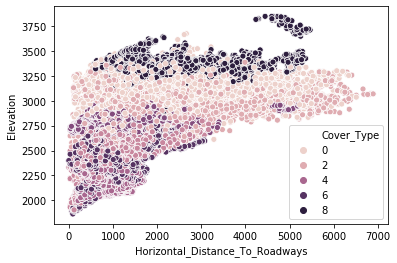

In [11]:
sns.scatterplot(x = 'Horizontal_Distance_To_Roadways', y = 'Elevation', data = original_train, hue='Cover_Type')

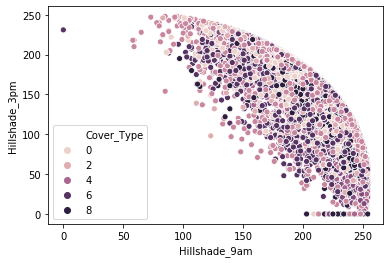

In [12]:
sns.scatterplot(x = 'Hillshade_9am', y = 'Hillshade_3pm', data = original_train, hue='Cover_Type')

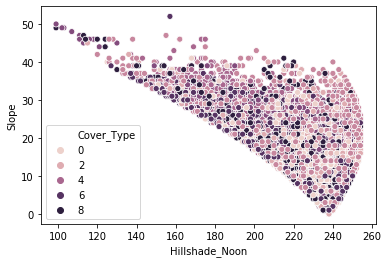

In [13]:
sns.scatterplot(x = 'Hillshade_Noon', y = 'Slope', data = original_train, hue='Cover_Type')

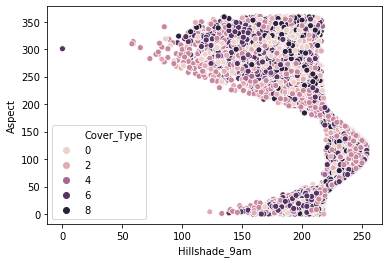

In [14]:
sns.scatterplot(x = 'Hillshade_9am', y = 'Aspect', data = original_train, hue='Cover_Type')

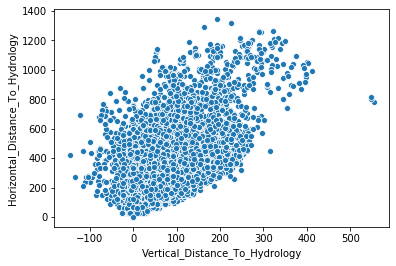

In [15]:
sns.scatterplot(x = 'Vertical_Distance_To_Hydrology', y = 'Horizontal_Distance_To_Hydrology', data = original_train)




Most correlated features:

* Vertical_Distance_To_Hydrology and Horizontal_Distance_To_Hydrology = 0.7
* 'Hillshade_9am' and 'Aspect'= -0.6
* 'Hillshade_Noon' and 'Slope' = -0.6
* 'Hillshade_9am' and 'Hillshade_3pm' = -0.8

We can remove the most correlated features, for example we can remove Horizontal_Distance_To_Hydrology, Hillshade_Noon, Hillshade_3pm, Aspect

In [16]:
#correlated_features = ['Horizontal_Distance_To_Roadways','Horizontal_Distance_To_Hydrology', 'Hillshade_Noon', 'Aspect', 'Hillshade_3pm']
#original_train.drop(columns=correlated_features, inplace=True)

Count the number of columns

In [17]:
original_train.columns.size

55

In [18]:
x_col = original_train.columns.drop('Cover_Type')
numerical_col = [col for col in  x_col if original_train[col].dtypes == 'int64']

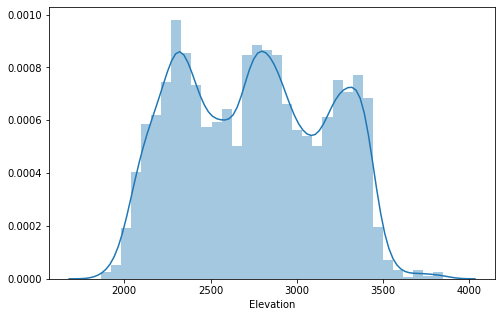

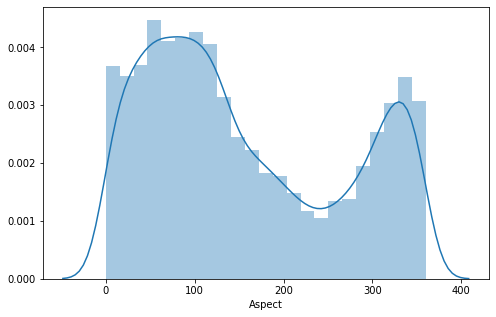

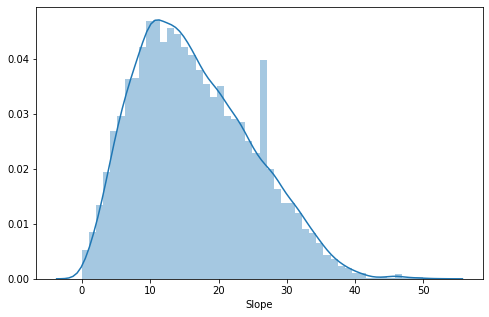

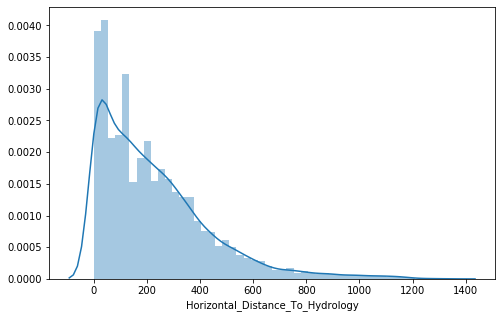

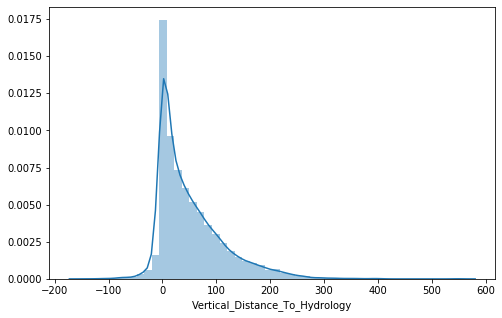

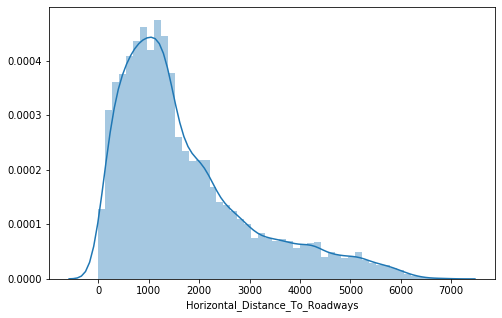

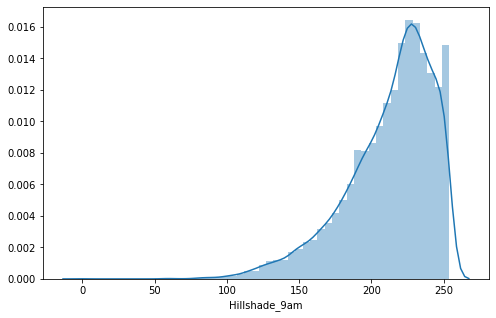

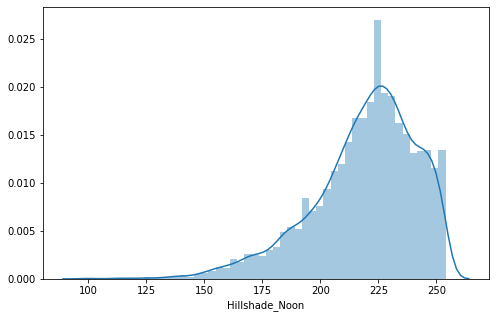

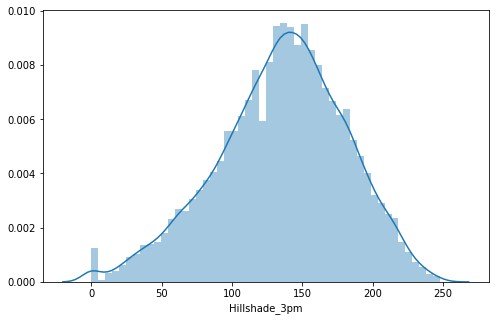

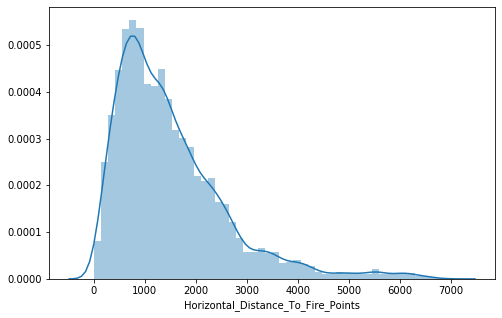

In [19]:

for col in numerical_col:
    fg = plt.subplots(figsize = (8,5))
    sns.distplot(original_train[col])

Based on the distribution of the variables we can say that:
* 'Horizontal_Distance_To_Fire_Points' has positive skewness
* Hillshade_9am has negative skewness
* Vertical_Distance_To_Hydrology has positive skewness


In [20]:
print("Skewness of Horizontal_Distance_To_Fire_Points: %f" %original_train['Horizontal_Distance_To_Fire_Points'].skew())
print("Skewness of Hillshade_9am: %f" %original_train['Hillshade_9am'].skew())
print("Skewness of Vertical_Distance_To_Hydrology: %f" %original_train['Vertical_Distance_To_Hydrology'].skew())

Skewness of Horizontal_Distance_To_Fire_Points: 1.617099
Skewness of Hillshade_9am: -1.093681
Skewness of Vertical_Distance_To_Hydrology: 1.537776


# Create pipeline

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import MinMaxScaler, FunctionTransformer, PowerTransformer
from sklearn.multiclass import OneVsRestClassifier
import numpy as np

In [22]:
X_train = X
y_train = y


In [23]:
svd = TruncatedSVD(n_components = 5, random_state = 0)
power_transf = PowerTransformer(method = 'yeo-johnson', standardize = True)

In [24]:
numerical_transformer = Pipeline(steps = [
    ('power', power_transf)
])
categorical_transformer = Pipeline(steps =  [
    ('svd', svd)
])

In [25]:
preprocessor = ColumnTransformer( transformers = [
    ('num', numerical_transformer, numerical_col),
    ('cat', categorical_transformer, cat_col)
])

In [29]:
import time
from sklearn.model_selection import cross_val_score

# Training XGBoost

In [30]:
from xgboost import XGBClassifier
from sklearn.metrics import f1_score

In [31]:
xgb = XGBClassifier(objective = 'binary:logistic')
ovr_xgb = OneVsRestClassifier(xgb)

In [32]:
pipeline_xgb = Pipeline (steps =[
    ('preprocessor',preprocessor),
    ('xgb', ovr_xgb)
])

In [33]:
param_grid_xgb = {'xgb__estimator__learning_rate': [0.1],
                 'xgb__estimator__max_depth': [15],
                 'xgb__estimator__n_estimators': [500]}

In [34]:
from sklearn.metrics import classification_report, confusion_matrix

def my_scorer(y_true,y_pred):
    print(classification_report(y_true,y_pred))
    cm = confusion_matrix(y_true,y_pred)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    cmat = pd.DataFrame(cm)
    cmat.columns = labels
    cmat.set_index([pd.Index(labels, '')],inplace=True)
    plt.subplots(figsize=(8,10))
    sns.heatmap(cmat,cmap="YlGnBu", annot=True)
    plt.title("Confusion Matrix")
    return f1_score(y_true, y_pred,average='micro')

In [35]:
custom_scorer = make_scorer(my_scorer)

In [36]:
xgb_clf = GridSearchCV(pipeline_xgb, param_grid = param_grid_xgb, scoring=custom_scorer, cv=5, iid = False)

In [ ]:
xgb_clf.get_params().keys()

              precision    recall  f1-score   support

           1       0.69      0.52      0.59       432
           2       0.57      0.92      0.71       432
           3       0.81      0.76      0.78       432
           4       0.88      0.91      0.89       432
           5       0.94      0.85      0.89       432
           6       0.78      0.72      0.75       432
           7       0.98      0.82      0.90       432

    accuracy                           0.79      3024
   macro avg       0.81      0.79      0.79      3024
weighted avg       0.81      0.79      0.79      3024

              precision    recall  f1-score   support

           1       0.58      0.61      0.59       432
           2       0.64      0.50      0.56       432
           3       0.79      0.68      0.73       432
           4       0.82      0.97      0.89       432
           5       0.85      0.88      0.87       432
           6       0.74      0.78      0.76       432
           7       0.85 

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('num',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('power',
                                                                                          PowerTransformer(copy=True,
                                                                                                           method='yeo-johnson',
               

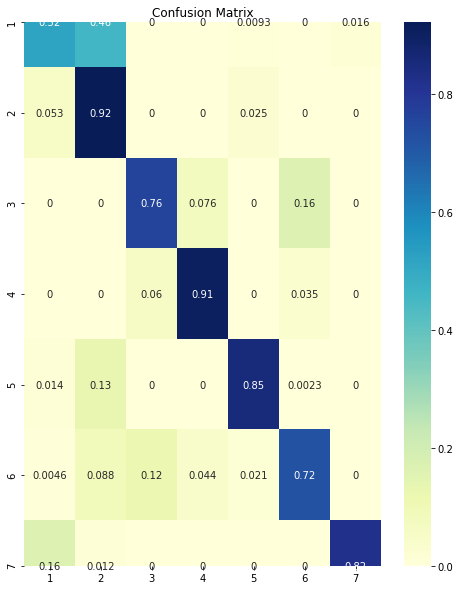

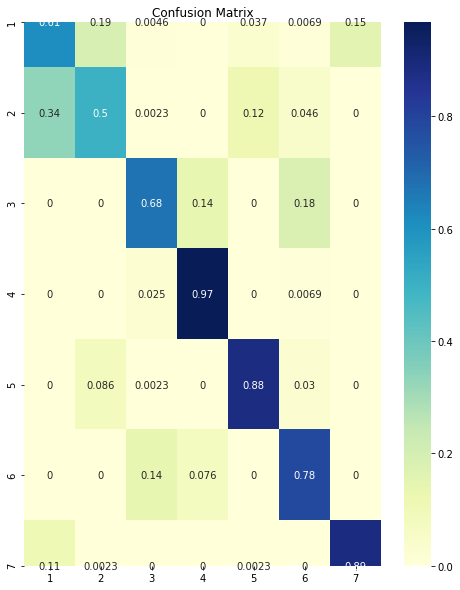

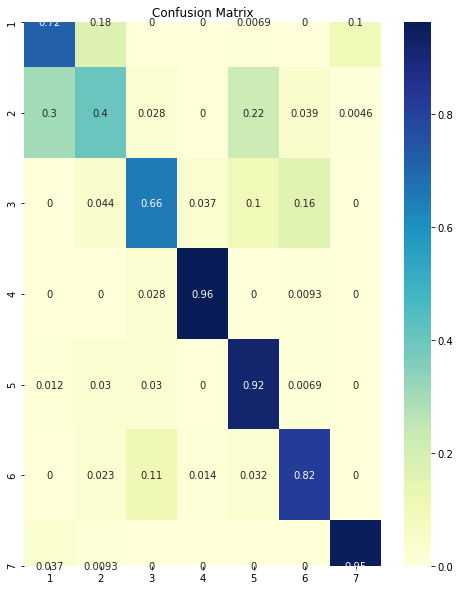

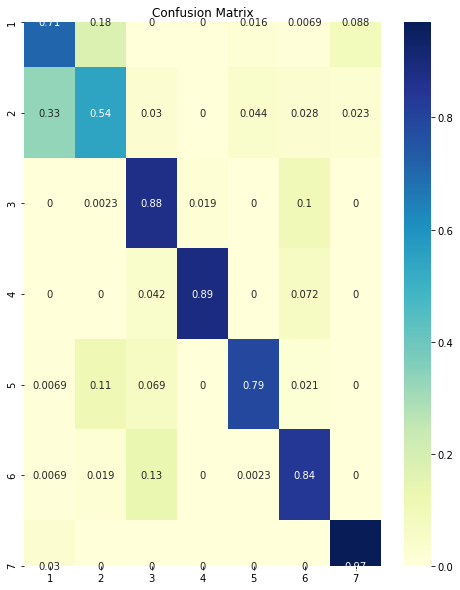

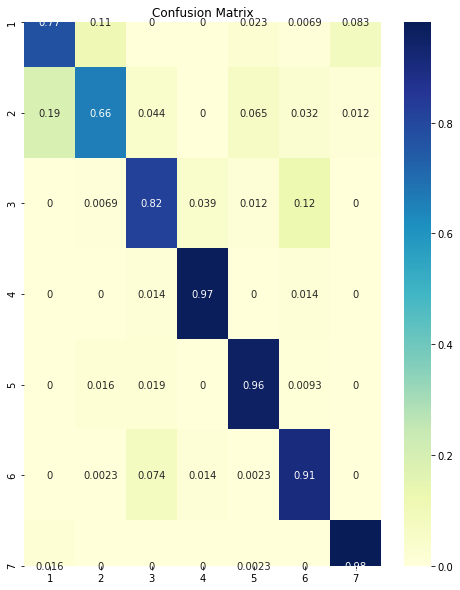

In [37]:
xgb_clf.fit(X_train, y_train)

# Resampling the classes:
Reduce the number of samples in the classes with higher precision to improve the precision in classes 1 and 2

In [44]:
from imblearn.under_sampling import RandomUnderSampler

In [69]:
sampling_strategy = {
    1:2160,
    2:2160,
    7:1000,
    3:1000,
    4:1000,
    5:1000,
    6:1000
}
rus = RandomUnderSampler(sampling_strategy = sampling_strategy,random_state = 0)

In [75]:
X_rus_array, y_rus_array = rus.fit_resample(X_train, y_train)

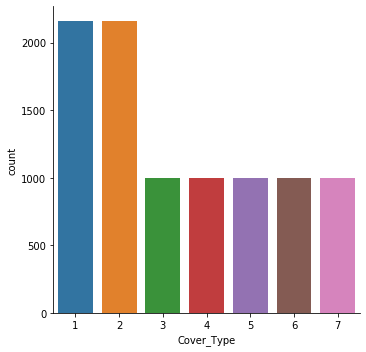

In [80]:
X_rus =  pd.DataFrame(X_rus_array, columns = X_train.columns)
y_rus = pd.DataFrame(y_rus_array, columns=['Cover_Type'])
sns.catplot(x= 'Cover_Type', kind='count', data=y_rus)

              precision    recall  f1-score   support

           1       0.82      0.81      0.81       432
           2       0.78      0.75      0.76       432
           3       0.77      0.80      0.78       200
           4       0.92      0.94      0.93       200
           5       0.81      0.86      0.83       200
           6       0.84      0.82      0.83       200
           7       0.93      0.95      0.94       200

    accuracy                           0.83      1864
   macro avg       0.84      0.85      0.84      1864
weighted avg       0.83      0.83      0.83      1864

              precision    recall  f1-score   support

           1       0.81      0.76      0.79       432
           2       0.77      0.75      0.76       432
           3       0.80      0.76      0.78       200
           4       0.92      0.96      0.94       200
           5       0.85      0.91      0.88       200
           6       0.80      0.84      0.82       200
           7       0.88 

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('num',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('power',
                                                                                          PowerTransformer(copy=True,
                                                                                                           method='yeo-johnson',
               

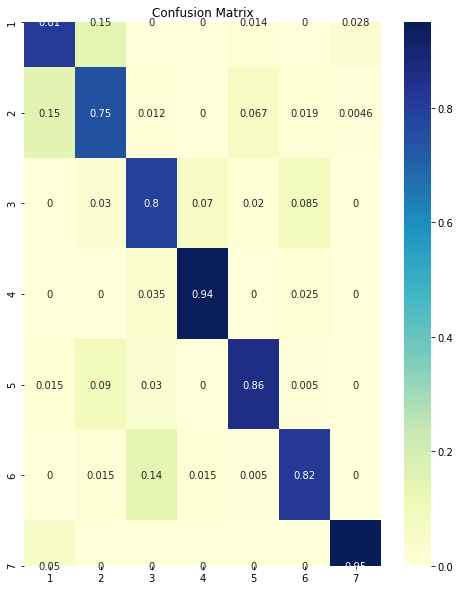

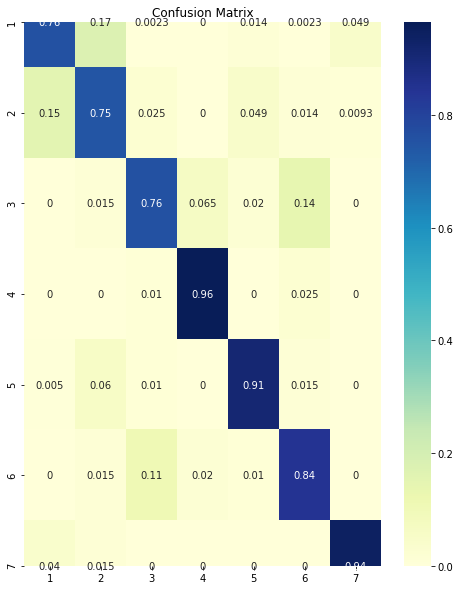

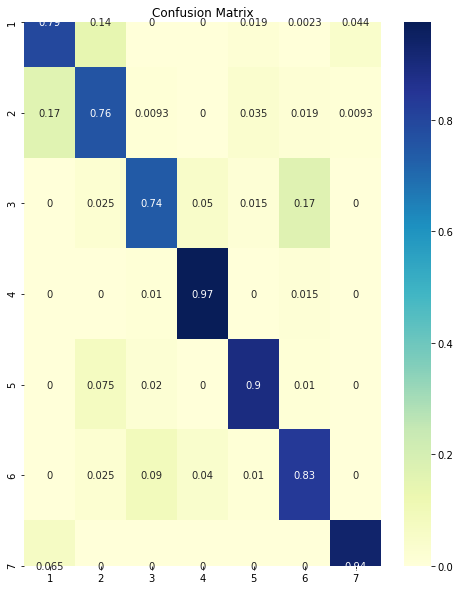

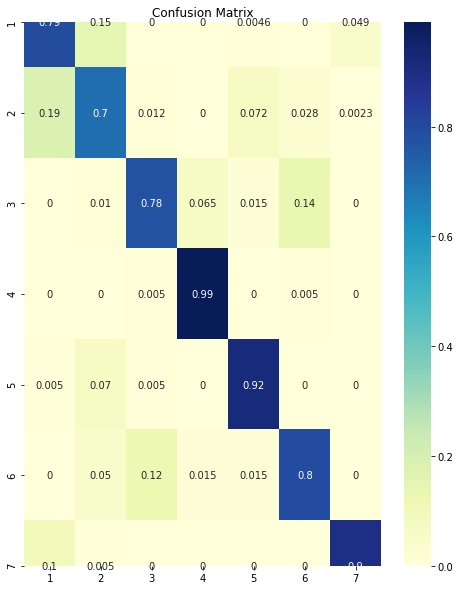

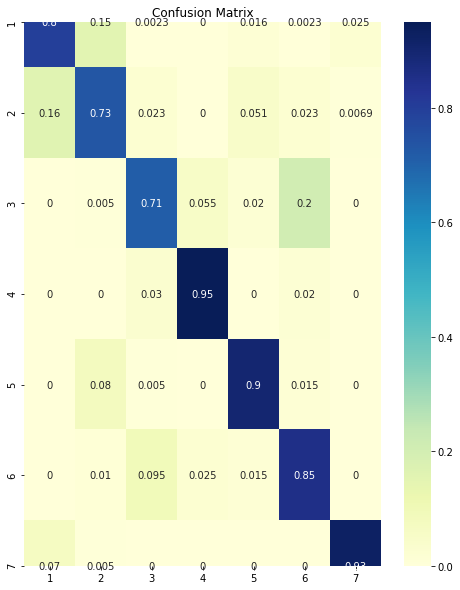

In [89]:
xgb_cfl_imb = GridSearchCV(pipeline_xgb, param_grid = param_grid_xgb, scoring=custom_scorer, cv=5, iid = False)
xgb_cfl_imb.fit(X_rus, y_rus)

In [91]:
xgb_cfl_imb_best = xgb_cfl_imb.best_estimator_
xgb_cfl_imb.best_score_

0.8245708154506438

In [92]:
start = time.time()
cv_folds = 5
scores = cross_val_score(xgb_cfl_imb_best, X_rus, y_rus, cv=cv_folds, scoring='precision_micro')
print('Accuracy of each version: {}'.format(scores))
print('Mean accuracy: {}'.format(scores.mean()))
print('Standard error: {}'.format(scores.std() / cv_folds**0.5))
end = time.time()
print('Time: {}'.format(end - start))

Accuracy of each version: [0.82939914 0.82457082 0.8304721  0.81652361 0.82188841]
Mean accuracy: 0.8245708154506438
Standard error: 0.0022811471701147377
Time: 166.38995218276978


In [94]:
y_pred = xgb_cfl_imb_best.predict(X_train)
#evaluate(y_train, y_pred, labels)
print("The accuracy in: {}".format(accuracy_score(y_train,y_pred))) 
f1_score(y_train, y_pred,average='micro')

The accuracy in: 0.9621031746031746


0.9621031746031746

# Prepare submission

In [95]:
X_test = pd.read_csv('/kaggle/input/learn-together/test.csv', index_col = 'Id')

In [96]:
X_test.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
Id,,,,,,,,,,,,,,,,,,,,,
15121,2680,354,14,0,0,2684,196,214,156,6645,...,0,0,0,0,0,0,0,0,0,0
15122,2683,0,13,0,0,2654,201,216,152,6675,...,0,0,0,0,0,0,0,0,0,0
15123,2713,16,15,0,0,2980,206,208,137,6344,...,0,0,0,0,0,0,0,0,0,0
15124,2709,24,17,0,0,2950,208,201,125,6374,...,0,0,0,0,0,0,0,0,0,0
15125,2706,29,19,0,0,2920,210,195,115,6404,...,0,0,0,0,0,0,0,0,0,0


## Predict test data

In [97]:
pred_test = xgb_cfl_imb_best.predict(X_test)

In [98]:
output = pd.DataFrame({
    'Id': X_test.index,
    'Cover_Type': pred_test
})
output.shape

(565892, 2)

In [99]:
output.to_csv('submission_v9', index = False)